## Bibliotecas utilizadas

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time

## Funções utilizadas

In [2]:
def d_euclidiana(x, w):
    '''
    Calcula a distância euclidiana entre os vetores x e w
    '''
    d = np.sqrt(sum(np.power(np.subtract(x, w),2)))
    return d

def BMU(x, w, net):
    '''
    Best Matching Unit (BMU) calcula qual é o neurônio com menor distância 
    euclidiana em relação ao dado de entrada x.
    Esta função retorna dois parâmetros: 'menor' é o menor valor de distância 
    encontrado e 'index' é a posição do neurônio na grade 2D.
    '''
    index = (0,0)
    all_d = np.zeros((net[0], net[1])) ###(10x10)
    menor = np.zeros((1,2))
    for i in range(net[0]):
        for j in range(net[1]):
            all_d[i][j] = d_euclidiana(x, w[i,j,:])
            if i==0 and j==0:
                menor = all_d[0][0]
            elif all_d[i][j] < menor:
                    menor = all_d[i][j]
                    index = (i,j)
    return index#, menor

def raio(epoca_atual, sigma_atual, tau1, index, net, x, w, eta):
    '''
    Calcula os pesos que serão atualizados com base no tamanho da vizinhança.
    Faz múltiplas chamadas a função refresh_w e
    Atualiza o valor dos pesos de aprendizagem
    '''
    #sigma_int = int(sigma_atual)
    eixo_x_min = int(np.floor(np.clip(index[0] - sigma, 0, net[0])))
    eixo_x_max = int(np.ceil(np.clip(index[0] + sigma, 0, net[0])))
    eixo_y_min = int(np.floor(np.clip(index[1] - sigma, 0, net[1])))
    eixo_y_max = int(np.ceil(np.clip(index[1] + sigma, 0, net[1])))
    if(sigma_atual > 1):
        for i in range(eixo_x_min, eixo_x_max):
            for j in range(eixo_y_min, eixo_y_max):
                d = d_euclidiana([index[0], index[1]], [i, j])
                if d < sigma:
                    D = np.subtract(x,w[i,j,:])
                    w[i,j,:] = refresh_w(w[i,j,:], d, sigma, eta, D)
    else:
        D = np.subtract(x,w[index[0],index[1],:])
        w[index[0], index[1], :] = refresh_w(w[index[0],index[1],:], 0, sigma, eta, D)
    return w

def refresh_w(w, d, sigma, eta, D):
    '''
    Atualiza o valor do peso passado como parâmetro
    '''
    viz = np.power(np.e, -(d**2)/(2*sigma**2))
    w = np.add(w, viz*eta*D)
    return w

def treino(x, w, net, dim, epocas, eta, sigma, tau1, tau2):
    '''
    Treina a rede
    passa o valor atual da epoca e do neurônio que foi ativado para raio()
    '''
    k = 0
    while k < epocas: 
        for i in range(len(x)):
            index = BMU(x[i,:], w, net)#pega o index do melhor neuronio para x
            w = raio(i, sigma, tau1, index, net, x[i,:], w, eta)
        print('Epoca', k, 'Sigma: ', sigma, 'eta: ', eta)        
        k = k + 1
        eta = eta * np.power(np.e, -k/tau2)
        sigma = sigma * np.power(np.e, -k/tau1)
    return w

## Parâmetros da Rede

In [4]:
eta = 0.2 #Taxa de aprendizagem
tau2 = 8000 #ajusta da taxa de aprendizagem botar 1000
sigma = 6 #Tamanho inicial da vizinhança (sempre inteiro)
tau1 = 8000/np.log10(sigma) #ajusta na vizinhança
net = [10, 10]
epocas = 300##Quantidade de vezes que os padrões de entrada serão aplicados na rede

## Criação de Parâmetros de Entrada

In [5]:
dim = 8
w = np.random.uniform(-1, 1, (net[0], net[1], dim))
N = 100
train_data = np.random.randn(4*N,8)
m1 = np.array([0,0,0,0,0,0,0,0])
m2 = np.array([4,0,0,0,0,0,0,0])
m3 = np.array([0,0,0,4,0,0,0,0])
m4 = np.array([0,0,0,0,0,0,0,4])
m = np.array([m1, m2, m3, m4])
for j in range(4):
    for i in range(N):
        train_data[i+N*j] = np.add(train_data[i+N*j], m[j])
np.random.shuffle(train_data)

A biblioteca time é utilizada apenas para medir o tempo que leva para o treinamento da rede, que é feito a seguir.

In [6]:
start = time.time()
print("START")
W_treinado = treino(train_data, w, net, dim, epocas, eta, sigma, tau1, tau2)
end = time.time()
print("END")
print(end - start)

START
Epoca 0 Sigma:  6 eta:  0.2
Epoca 1 Sigma:  5.999416414945013 eta:  0.19997500156243492
Epoca 2 Sigma:  5.998249415115275 eta:  0.19992501406074237
Epoca 3 Sigma:  5.996499340988456 eta:  0.19985005623594015
Epoca 4 Sigma:  5.994166703074103 eta:  0.1997501561849162
Epoca 5 Sigma:  5.991252181665447 eta:  0.19962535134287643
Epoca 6 Sigma:  5.987756626508751 eta:  0.19947568845996583
Epoca 7 Sigma:  5.9836810563904 eta:  0.19930122357208305
Epoca 8 Sigma:  5.979026658642048 eta:  0.1991020219659142
Epoca 9 Sigma:  5.973794788564122 eta:  0.19887815813821627
Epoca 10 Sigma:  5.967986968768109 eta:  0.1986297157493858
Epoca 11 Sigma:  5.961604888438042 eta:  0.19835678757135317
Epoca 12 Sigma:  5.954650402511711 eta:  0.19805947542984828
Epoca 13 Sigma:  5.9471255307821425 eta:  0.19773789014108742
Epoca 14 Sigma:  5.939032456919954 eta:  0.1973921514429368
Epoca 15 Sigma:  5.930373527417261 eta:  0.1970223879206126
Epoca 16 Sigma:  5.92115125045383 eta:  0.19662873692698202
Epoca 

Epoca 135 Sigma:  2.4567292925159907 eta:  0.06348587032349924
Epoca 136 Sigma:  2.4244442870679346 eta:  0.062415732472099104
Epoca 137 Sigma:  2.3923508410038683 eta:  0.06135596322703947
Epoca 138 Sigma:  2.360452620331044 eta:  0.06030664921431218
Epoca 139 Sigma:  2.32875318576778 eta:  0.05926787169686435
Epoca 140 Sigma:  2.2972559927712473 eta:  0.05823970662603447
Epoca 141 Sigma:  2.2659643916157255 eta:  0.05722222469539656
Epoca 142 Sigma:  2.2348816275206134 eta:  0.05621549139693085
Epoca 143 Sigma:  2.204010840827439 eta:  0.05521956707943881
Epoca 144 Sigma:  2.173355067225106 eta:  0.05423450700912006
Epoca 145 Sigma:  2.142917238022579 eta:  0.05326036143222792
Epoca 146 Sigma:  2.1127001804682006 eta:  0.052297175639720334
Epoca 147 Sigma:  2.0827066181147957 eta:  0.05134499003382249
Epoca 148 Sigma:  2.052939171229726 eta:  0.05040384019641731
Epoca 149 Sigma:  2.0234003572490065 eta:  0.049473756959179986
Epoca 150 Sigma:  1.9940925912746106 eta:  0.04855476647537

Epoca 264 Sigma:  0.199746368829955 eta:  0.002523930393757346
Epoca 265 Sigma:  0.19466344526729545 eta:  0.002441694746759081
Epoca 266 Sigma:  0.18969141431966 eta:  0.002361843283600734
Epoca 267 Sigma:  0.1848283984526511 eta:  0.002284317668828108
Epoca 268 Sigma:  0.18007253677428295 eta:  0.002209060620452891
Epoca 269 Sigma:  0.1754219853229978 eta:  0.0021360159035405963
Epoca 270 Sigma:  0.1708749173401577 eta:  0.0020651283233658366
Epoca 271 Sigma:  0.16642952352725487 eta:  0.0019963437181542316
Epoca 272 Sigma:  0.16208401228808683 eta:  0.0019296089514299702
Epoca 273 Sigma:  0.1578366099561464 eta:  0.0018648719039877505
Epoca 274 Sigma:  0.15368556100748057 eta:  0.0018020814655075358
Epoca 275 Sigma:  0.1496291282592748 eta:  0.0017411875258302428
Epoca 276 Sigma:  0.14566559305442245 eta:  0.0016821409659121694
Epoca 277 Sigma:  0.14179325543234184 eta:  0.001624893648475649
Epoca 278 Sigma:  0.13801043428630513 eta:  0.0015693984083730845
Epoca 279 Sigma:  0.134315

## Geração de Dados para Teste

In [7]:
x = []
y = []
t = np.zeros((2,1))
for i in range(4):
    index = BMU(m[i], W_treinado, net)
    x.append(float(index[0]))
    y.append(float(index[1]))

n_test = 500
test_data1 = np.random.randn(n_test,8)
t1 = np.zeros((2,n_test))
for i in range(len(test_data1)):
    index = BMU(test_data1[i,:], W_treinado, net)
    t1[0,i] = index[0]
    t1[1,i] = index[1]

test_data2 = np.add(np.random.randn(n_test,8), m[1])
t2 = np.zeros((2,n_test))
for i in range(len(test_data2)):
    index = BMU(test_data2[i,:], W_treinado, net)
    t2[0,i] = index[0]
    t2[1,i] = index[1]

test_data3 = np.add(np.random.randn(n_test,8), m[2])
t3 = np.zeros((2,n_test))
for i in range(len(test_data3)):
    index = BMU(test_data3[i,:], W_treinado, net)
    t3[0,i] = index[0]
    t3[1,i] = index[1]

test_data4 = np.add(np.random.randn(n_test,8), m[3])
t4 = np.zeros((2,n_test))
for i in range(len(test_data4)):
    index = BMU(test_data4[i,:], W_treinado, net)
    t4[0,i] = index[0]
    t4[1,i] = index[1]

O plot dos vetores média utilizados para a geração dos padrões de entrada é mostrado a seguir.

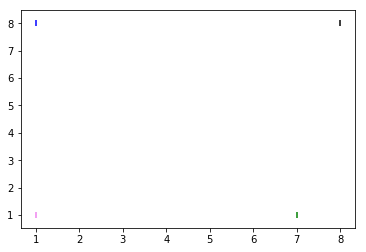

In [10]:
colors = ['black', 'green', 'violet', 'blue']
for i in range(4):
    plt.scatter(x[i], y[i], color=colors[i], marker='|')
plt.show()

O plot dos padrões de teste são mostrados a seguir:

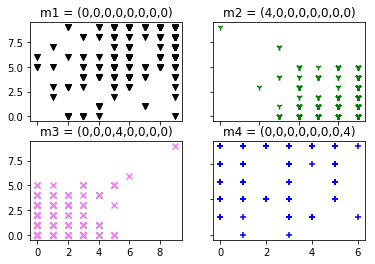

In [11]:
f, axarr = plt.subplots(2, 2)
axarr[0, 0].scatter(t1[0,:], t1[1,:], color='black', marker='v')
axarr[0, 0].set_title('m1 = (0,0,0,0,0,0,0,0)')
axarr[0, 1].scatter(t2[0,:], t2[1,:], color='green', marker='1')
axarr[0, 1].set_title('m2 = (4,0,0,0,0,0,0,0)')
axarr[1, 0].scatter(t3[0,:], t3[1,:], color='violet', marker='x')
axarr[1, 0].set_title('m3 = (0,0,0,4,0,0,0,0)')
axarr[1, 1].scatter(t4[0,:], t4[1,:], color='blue', marker='+')
axarr[1, 1].set_title('m4 = (0,0,0,0,0,0,0,4)')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

plt.show()

Pode-se notar que apesar dos dados estarem separados ainda existe uma sobreposição de dados, isso se dá pelo fato da sobreposição das distribuições marginais nos quatro padrões de dados. Contudo, a rede apresenta um bom desempenho, como será mostrado a seguir.

Imagine duas retas perpendiculares que separa a grade 10x10 em quatro grades menores 5x5. O padrão t3, que é mostrado em rosa na figura acima parece estar contido em X no intervalo [0,5] e Y no intervalo [0,5]. O código a seguir mostra quanto dos 500 dados de teste com média m3 foram ficaram dentro da grade 5x5 com os limites citados acima.

In [12]:
axis_x = t3[0] < 5
axis_y = t3[1] < 5
cnt = 0
for i in range(n_test):
    if axis_x[i]==True and axis_y[i]==True:
        cnt = cnt + 1
print("Total de dados da C3: 500")
print("Quantidade de dados entre (x=0 e x=5), (y=0 e y=5)", cnt)

Total de dados da C3: 500
Quantidade de dados entre (x=0 e x=5), (y=0 e y=5) 484


O resultado acima diz que dos 500 dados de teste com média m3, 484/500 ficaram dentro da mesma região 5x5. A seguir, o mesmo é feito para as outras entradas.

In [13]:
axis_x = t4[0] < 5
axis_y = t4[1] > 5
cnt = 0
for i in range(n_test):
    if axis_x[i]==True and axis_y[i]==True:
        cnt = cnt + 1
print("Total de dados da C4: 500")
print("Quantidade de dados entre (x=0 e x=5), (y=5 e y=10)", cnt)

Total de dados da C4: 500
Quantidade de dados entre (x=0 e x=5), (y=5 e y=10) 454


In [14]:
axis_x = t2[0] > 5
axis_y = t2[1] < 5
cnt = 0
for i in range(n_test):
    if axis_x[i]==True and axis_y[i]==True:
        cnt = cnt + 1
print("Total de dados da C2: 500")
print("Quantidade de dados entre (x=5 e x=10), (y=0 e y=5)", cnt)

Total de dados da C2: 500
Quantidade de dados entre (x=5 e x=10), (y=0 e y=5) 462


In [15]:
axis_x = t1[0] > 5
axis_y = t1[1] > 5
cnt = 0
for i in range(n_test):
    if axis_x[i]==True and axis_y[i]==True:
        cnt = cnt + 1
print("Total de dados da C1: 500")
print("Quantidade de dados entre (x=5 e x=10), (y=5 e y=10)", cnt)

Total de dados da C1: 500
Quantidade de dados entre (x=5 e x=10), (y=5 e y=10) 281


O desempenho do padrão com média m1 é muito pior em relação aos outros, mas isso se dá pelo fato desse padrão de entrada não possuir nenhuma distribuição marginal que dimi